<a href="https://colab.research.google.com/github/marcelorandolfo/medium/blob/master/extracao_legendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando pacotes

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### Instalando pacotes 

In [0]:
# Youtube transcript API
!pip install youtube_transcript_api -q

In [0]:
#  Wordcloud
!pip install wordcloud -q

### Obtendo os dados

In [0]:
# importando pacote
from youtube_transcript_api import YouTubeTranscriptApi

# obtendo os dados
transcript = YouTubeTranscriptApi.get_transcript('eYfFDaPdkWc', languages=['pt'])

# convertendo em DataFrame
df = pd.DataFrame(transcript)

# visualizando cinco primeiras entradas
df.head()

,text,start,duration
0,"Com vocês, o fenômeno da internet.",26.100,4.870
1,Whindersson Nunes!,31.073,6.006
2,"Obrigado, Salvador!",57.558,2.294
3,"Que coisa linda,\nque coisa maravilhosa!",59.935,2.800
4,Obrigado!\nUma salva de palmas para vocês!,63.610,2.248


### Limpando caracteres

In [0]:
# trocando pontuações por espaços
char = ["\n","!","?",".",","]
for symbol in char:
  df['text'] = df['text'].str.replace(symbol, " ")

# visualizando cinco primeiras entradas
df.head()

,text,start,duration
0,Com vocês o fenômeno da internet,26.100,4.870
1,Whindersson Nunes,31.073,6.006
2,Obrigado Salvador,57.558,2.294
3,Que coisa linda que coisa maravilhosa,59.935,2.800
4,Obrigado Uma salva de palmas para vocês,63.610,2.248


### Plotando o Wordcloud

In [0]:
# concatenar as palavras
palavras = " ".join(s for s in df['text'])

print("Quantidade de Palavras: {}".format(len(palavras)))

Quantidade de Palavras: 43735


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


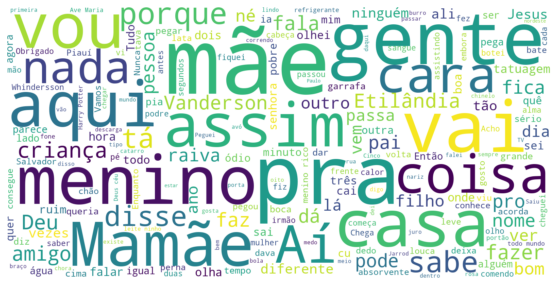

In [0]:
# importar wordcloud
from wordcloud import WordCloud

# importar a biblioteca nltk
import nltk
 
# baixar a base de stopwords
nltk.download('stopwords')
 
# atribuir as stopwords (em português) à variável
stopwords = nltk.corpus.stopwords.words('portuguese')

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.show()


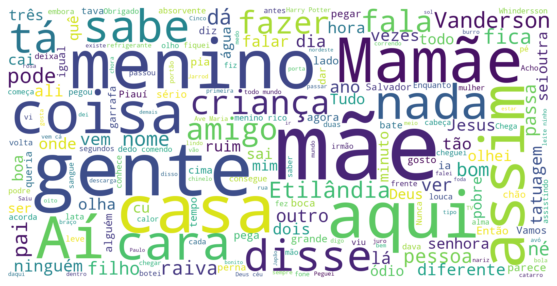

In [0]:
# lista de stopword
stopwords.extend(["pra","pro","deu","faz","vou","quer","vai","porque"])


# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.show()

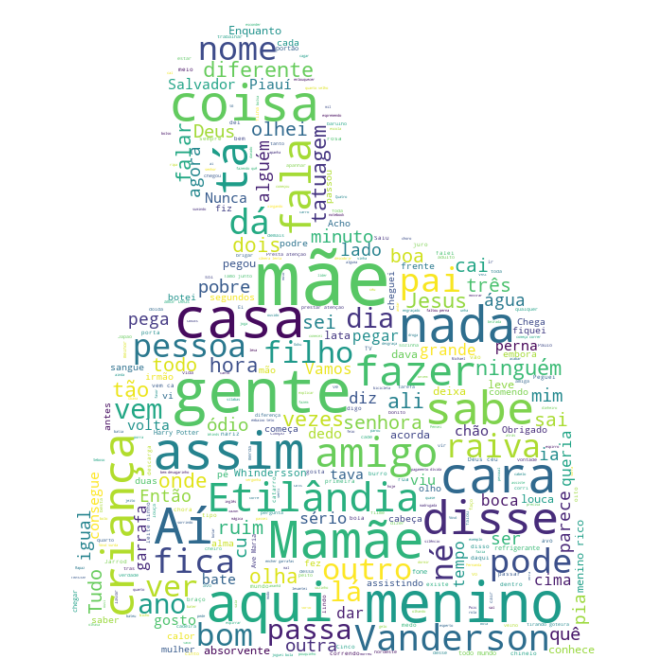

In [0]:
# endereço LOCAL da SUA imagem
wnunes = np.array(Image.open("/content/whinderssonnunes.jpeg"))

wordcloud = WordCloud(background_color="white", max_words=2000, 
                      mask=wnunes, stopwords=stopwords, 
                      max_font_size=80, random_state=42).generate(palavras)


fig, ax = plt.subplots(figsize = (20,12))
ax.imshow(wordcloud, interpolation="bilinear")
ax.set_axis_off()
plt.show()